In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
output_notebook()

from scripts_viz.visualization_utils import *
from scripts_viz.visualization_perfgrid import *
from scripts_viz.visualization_utils import TTQcolor
from scripts_mlflow.mlflow_utils import *

from bokeh.io import export_png
from bokeh.layouts import gridplot, row, column

import mlflow


Loading BokehJS ...

In [2]:
pd.set_option("display.max_rows", 101)

In [3]:
expnames = set([exp.name for exp in mlflow.tracking.MlflowClient().list_experiments()])
expnames

{'MLP_enriched_time_seq24000_6000_imp',
 'MLP_enriched_time_seq24000_6000_p180',
 'MLP_enriched_time_seq24000_6000_p90',
 'MLP_enriched_time_seq26000_2000_opt_p180',
 'benchmarks_shuffle_imp',
 'benchmarks_shuffle_p180',
 'benchmarks_shuffle_p90',
 'benchmarks_time_old_imp',
 'benchmarks_time_old_p180',
 'benchmarks_time_old_p90',
 'benchmarks_time_opt_imp',
 'benchmarks_time_opt_p90',
 'enriched_shuffle_imp',
 'enriched_shuffle_p180',
 'enriched_shuffle_p90',
 'enriched_time_seq24000_6000_imp',
 'enriched_time_seq24000_6000_opt_imp',
 'enriched_time_seq26000_2000_opt_p180',
 'enriched_time_seq26000_2000_opt_p90',
 'enriched_time_seq26000_2000_p180',
 'enriched_time_seq26000_2000_p90'}

In [4]:
colors = [ TTQcolor['algae'], TTQcolor['pea'], TTQcolor['borderColour']]

#--------------------------------------------------

sgd_cols = ['eta0', 'shuffle', 'fit_intercept', 'n_iter_no_change', 'penalty', 'max_iter', 'alpha', 'early_stopping',
           'learning_rate', 'loss', 'val_auc', 'test_auc']

sgd_spider_cols = ['eta0','max_iter','alpha','test_auc', 'val_auc']

sgd_spider_cols_to_norm = ['eta0','max_iter','alpha']

#--------------------------------------------------
rf_cols = ['n_estimators', 'max_depth', 'max_features', 'max_leaf_nodes', 
                                        'min_samples_leaf', 'min_samples_split', 'bootstrap',
                                        'criterion', 'val_auc', 'test_auc']
rf_spider_cols = ['n_estimators',  'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split', 'test_auc', 'val_auc']

rf_spider_cols_to_norm = ['n_estimators',  'max_leaf_nodes', 'min_samples_leaf', 'min_samples_split']

#--------------------------------------------------
ann_cols = ['batch_size', 'optimizer', 'epochs_actual', 'class_1_weight', 'early_stopping', 'early_stopping_metric',
            'hidden_layers_no', 'hidden_nodes', 'hl_out_activations', 'loss_func', 'dropout', 'tr_accuracy',
             'val_auc', 'test_auc']


In [5]:
experiment_1_imp = ['benchmarks_shuffle_imp', 'benchmarks_time_old_imp']
experiment_1_p90 = ['benchmarks_shuffle_p90', 'benchmarks_time_old_p90']
experiment_1_p180 = ['benchmarks_shuffle_p180', 'benchmarks_time_old_p180']

experiment_2_imp = ['benchmarks_time_old_imp', 'benchmarks_time_opt_imp']
experiment_2_p90 = ['benchmarks_time_old_p90', 'benchmarks_time_opt_p90']
experiment_2_p180 = ['benchmarks_time_old_p180', 'benchmarks_time_opt_p180']

experiment_3_imp = ['enriched_time_seq24000_6000_imp', 'enriched_shuffle_imp', 'benchmarks_time_old_imp', 'benchmarks_shuffle_imp']
experiment_3_p90 = ['enriched_time_seq26000_2000_p90', 'enriched_shuffle_p90', 'benchmarks_time_old_p90', 'benchmarks_shuffle_p90']
experiment_3_p180 = ['enriched_time_seq26000_2000_p180', 'enriched_shuffle_p180', 'benchmarks_time_old_p180', 'benchmarks_shuffle_p180']

experiment_4_imp = ['enriched_time_seq24000_6000_opt_imp', 'enriched_time_seq24000_6000_imp', 'benchmarks_time_opt_imp']
experiment_4_p90 = ['enriched_time_seq26000_2000_opt_p90', 'enriched_time_seq26000_2000_p90', 'benchmarks_time_opt_p90']
experiment_4_p180 = ['enriched_time_seq26000_2000_opt_p180', 'enriched_time_seq26000_2000_p180', 'benchmarks_time_opt_p180']

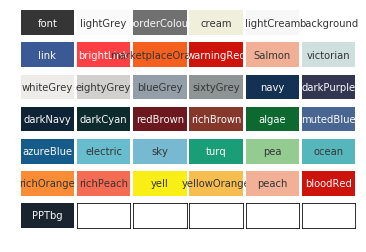

In [6]:
colordemo()

In [7]:
TTQcolor.keys()

dict_keys(['font', 'lightGrey', 'borderColour', 'cream', 'lightCream', 'background', 'link', 'brightLink', 'marketplaceOrange', 'warningRed', 'Salmon', 'victorian', 'whiteGrey', 'eightyGrey', 'blueGrey', 'sixtyGrey', 'navy', 'darkPurple', 'darkNavy', 'darkCyan', 'redBrown', 'richBrown', 'algae', 'mutedBlue', 'azureBlue', 'electric', 'sky', 'turq', 'pea', 'ocean', 'richOrange', 'richPeach', 'yell', 'yellowOrange', 'peach', 'bloodRed', 'PPTbg'])

In [17]:
def color_generator(experiment):
    color_list = []
    for e in experiment:
        if "benchmarks" in e:
            if "shuffle" in e:
                color_list.append(TTQcolor['azureBlue'])
            elif "time_old" in e:
                color_list.append(TTQcolor['electric'])
            elif "time_opt" in e:
                color_list.append(TTQcolor['pea'])
        elif "enriched" in e:
            if "shuffle" in e:
                color_list.append(TTQcolor['yell'])
            elif "time_seq" in e and "opt" not in e:
                color_list.append(TTQcolor['richOrange'])
            elif "time_seq" in e and "opt" in e:
                color_list.append(TTQcolor['bloodRed'])
    return color_list
    

In [18]:
#vals_1 = [v for v in viz_1.loc['test_predictions', 'benchmarks_shuffle_imp_SGD_190824_154114'].split(',')[:-1]]
#vals_1 = [float(i) for i in vals_1]
#vals_2 = [v for v in viz_1.loc['test_predictions', 'benchmarks_shuffle_imp_RF_190824_154156'].split(',')[:-1]]
#vals_2 = [float(i) for i in vals_2]
#a = cor_scatterplot(vals_1, vals_2, xaxis_label='benchmarks_shuffle_imp_SGD_190824_154114', 
              #  yaxis_label='benchmarks_shuffle_imp_RF_190824_154156', circle_size=10, title_size='12pt')

#show(a)

In [19]:
for clf in ('rf_', 'sgd_'):
    for mult_exp in [experiment_1_imp, experiment_2_imp, experiment_3_imp]:
                      #('benchmarks_shuffle_p90', 'benchmarks_time_old_p90'),
                      #('benchmarks_shuffle_p180', 'benchmarks_time_old_p180')
                      #]:
        colors = color_generator(mult_exp)
        viz_list=[]
        for experiment in mult_exp:
            viz_tmp = create_exp_df(experiment)
            viz_tmp.columns = experiment+'_'+viz_tmp.columns
            viz_list.append(viz_tmp)
            
        viz = pd.concat(viz_list, axis=1)
        #experiment_1 = double_exp[0]
        #experiment_2 = double_exp[1]
        
        #viz_1 = create_exp_df(experiment_1)
        #viz_1.columns = experiment_1+'_'+viz_1.columns
        #viz_2 = create_exp_df(experiment_2)
        #viz_2.columns = experiment_2+'_'+viz_2.columns
        #viz = pd.concat([viz_1, viz_2], axis=1)
        
        if clf=='rf_':
            model_filter = ['RandomForestClassifier']
            metric_cols = rf_cols
            spider_cols = rf_spider_cols
            spider_cols_to_norm = rf_spider_cols_to_norm
            index_header = 'RF'
            spr_settings = {'viz_dict': viz, 
                                             'metric_list': rf_cols, 
                                             'model_type': ['RandomForestClassifier'], 
                                             'color_cells':True, 
                                             'colors':colors,
                                             'index_header':'RF', 
                                             'width':1200, 
                                             'height':120, 
                                             'index_width':40,
                                             'row_height':25}

        elif clf=='sgd_':
            model_filter = ['SGDClassifier']
            metric_cols = sgd_cols
            spider_cols = sgd_spider_cols
            spider_cols_to_norm = sgd_spider_cols_to_norm
            index_header = 'SGD'
            spr_settings = {'viz_dict': viz, 
                                             'metric_list': sgd_cols, 
                                             'model_type': ['SGDClassifier'], 
                                             'color_cells':True, 
                                             'colors':colors,
                                             'index_header':'SGD', 
                                             'width':1200, 
                                             'height':120, 
                                             'index_width':40,
                                             'row_height':25}
            
            
        grid = performance_grid(viz,
                     model_filter = model_filter, 
                     legend_font_size='12pt', 
                     fpr_font_size='9pt', 
                     bestFprOnly=True, 
                     rocs_p_width=600, 
                     rocs_p_height=600,
                     rocs_line_width=2, 
                     single_spider=True, 
                     add_spider=True,
                     spider_in_row=2, 
                     spiders_params = spider_cols,
                     spiders_params_to_norm=spider_cols_to_norm,
                     spider_p_width=600, 
                     spider_p_height=600, 
                     spider_text_size='8pt', 
                     spider_line_width=4.5, 
                     spider_fill_alpha=0.1,
                     spider_margin_distance=0.25, 
                     normalize_spider=True,
                     single_row_folds=True, 
                    add_corr_scatter=False,
                     folds_p_width=600, 
                     folds_p_height=600, 
                     folds_xlabelorientation=1.55, 
                     folds_group_text_font_size='8pt',
                     folds_in_row=2, 
                     spreadsheet_settings = [spr_settings],
                     plot_feat_importance=True,
                     normalize_importance=False,
                     fimp_text_group_size = '10pt',
                     colors=colors)
        
        name = clf
        for e in mult_exp:
            name+=e
        name+='.png'
        
        
        export_png(grid, name)

C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
